In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = '../../images/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train') # Directory of training images
validation_dir = os.path.join(base_dir, 'validation') # Directory of validation images

# Directory with our training cat images
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog images
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat images
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog images
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])



In [4]:
# Scale all images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Epoch 1/100
100/100 - 98s - loss: 0.6923 - accuracy: 0.5225 - val_loss: 0.6772 - val_accuracy: 0.6510
Epoch 2/100
100/100 - 103s - loss: 0.6651 - accuracy: 0.6010 - val_loss: 0.6431 - val_accuracy: 0.6300
Epoch 3/100
100/100 - 105s - loss: 0.6171 - accuracy: 0.6725 - val_loss: 0.6076 - val_accuracy: 0.6830
Epoch 4/100
100/100 - 102s - loss: 0.5655 - accuracy: 0.7050 - val_loss: 0.5841 - val_accuracy: 0.6970
Epoch 5/100
100/100 - 100s - loss: 0.5359 - accuracy: 0.7305 - val_loss: 0.6391 - val_accuracy: 0.6620
Epoch 6/100
100/100 - 101s - loss: 0.5054 - accuracy: 0.7440 - val_loss: 0.5417 - val_accuracy: 0.7240
Epoch 7/100
100/100 - 100s - loss: 0.4700 - accuracy: 0.7715 - val_loss: 0.5559 - val_accuracy: 0.7150
Epoch 8/100
100/100 - 99s - loss: 0.4520 - accuracy: 0.7835 - val_loss: 0.5255 - val_accuracy: 0.7370
Epoch 9/100
100/100 - 100s - loss: 0.4286 - accuracy: 0.8065 - val_loss: 0.5639 - val_accuracy: 0.7260
Epoch 10/100
100/100 - 100s - loss: 0.4052 - accuracy: 0.8165 - val_loss: 0

Epoch 80/100
100/100 - 99s - loss: 0.0075 - accuracy: 0.9985 - val_loss: 2.3071 - val_accuracy: 0.7490
Epoch 81/100
100/100 - 101s - loss: 0.0068 - accuracy: 0.9980 - val_loss: 2.3144 - val_accuracy: 0.7330
Epoch 82/100
100/100 - 99s - loss: 7.1997e-05 - accuracy: 1.0000 - val_loss: 2.2809 - val_accuracy: 0.7500
Epoch 83/100
100/100 - 99s - loss: 0.0031 - accuracy: 0.9985 - val_loss: 2.2516 - val_accuracy: 0.7430
Epoch 84/100
100/100 - 99s - loss: 0.0086 - accuracy: 0.9970 - val_loss: 2.3684 - val_accuracy: 0.7390
Epoch 85/100
100/100 - 99s - loss: 3.7206e-05 - accuracy: 1.0000 - val_loss: 2.3741 - val_accuracy: 0.7470
Epoch 86/100
100/100 - 99s - loss: 0.0107 - accuracy: 0.9980 - val_loss: 2.1556 - val_accuracy: 0.7510
Epoch 87/100
100/100 - 102s - loss: 0.0044 - accuracy: 0.9975 - val_loss: 2.2572 - val_accuracy: 0.7490
Epoch 88/100
100/100 - 100s - loss: 0.0179 - accuracy: 0.9975 - val_loss: 2.4544 - val_accuracy: 0.7390
Epoch 89/100
100/100 - 100s - loss: 1.1208e-04 - accuracy: 1.0

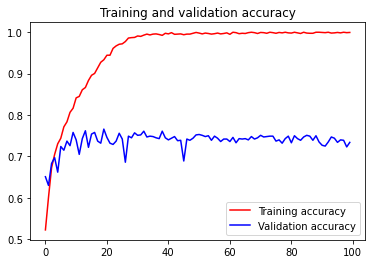

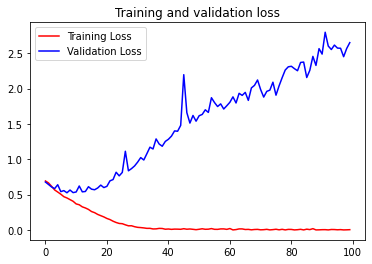

In [6]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40, # Rotate image by 40 degrees
      width_shift_range=0.2, # Randomly translate the image horizontally
      height_shift_range=0.2, # Randomly translate the image veritcally
      shear_range=0.2, # Shearing transforms.  
      zoom_range=0.2, # Randomly zoom inside of the picture
      horizontal_flip=True, # Randomly flip half of the image horizontally
      fill_mode='nearest') # strategy used for filling in newly created pixels, 
    # which can appear after a rotation or a width/height shift.

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history1 = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 126s - loss: 0.7757 - accuracy: 0.6720 - val_loss: 0.5579 - val_accuracy: 0.7200
Epoch 2/100
100/100 - 145s - loss: 0.6092 - accuracy: 0.6740 - val_loss: 0.5272 - val_accuracy: 0.7440
Epoch 3/100
100/100 - 131s - loss: 0.5878 - accuracy: 0.7020 - val_loss: 0.5210 - val_accuracy: 0.7340
Epoch 4/100
100/100 - 116s - loss: 0.5767 - accuracy: 0.7005 - val_loss: 0.5075 - val_accuracy: 0.7510
Epoch 5/100
100/100 - 118s - loss: 0.5598 - accuracy: 0.7320 - val_loss: 0.4844 - val_accuracy: 0.7560
Epoch 6/100
100/100 - 114s - loss: 0.5364 - accuracy: 0.7295 - val_loss: 0.5394 - val_accuracy: 0.7500
Epoch 7/100
100/100 - 111s - loss: 0.5577 - accuracy: 0.7175 - val_loss: 0.5176 - val_accuracy: 0.7410
Epoch 8/100
100/100 - 111s - loss: 0.5364 - accuracy: 0.7325 - val_loss: 0.4896 - val_accuracy: 0.7460
Epoch 9/100
100/100 - 111s - loss: 0.5324 - accuracy: 0.7350 - val_loss: 0.5150 - val_accura

100/100 - 123s - loss: 0.4172 - accuracy: 0.8200 - val_loss: 0.4935 - val_accuracy: 0.7800
Epoch 80/100
100/100 - 112s - loss: 0.4104 - accuracy: 0.8180 - val_loss: 0.7044 - val_accuracy: 0.7390
Epoch 81/100
100/100 - 114s - loss: 0.4224 - accuracy: 0.8150 - val_loss: 0.4117 - val_accuracy: 0.8110
Epoch 82/100
100/100 - 116s - loss: 0.4165 - accuracy: 0.8100 - val_loss: 0.4140 - val_accuracy: 0.8080
Epoch 83/100
100/100 - 113s - loss: 0.4099 - accuracy: 0.8205 - val_loss: 0.4149 - val_accuracy: 0.8010
Epoch 84/100
100/100 - 113s - loss: 0.4130 - accuracy: 0.8075 - val_loss: 0.4280 - val_accuracy: 0.8030
Epoch 85/100
100/100 - 113s - loss: 0.4234 - accuracy: 0.8075 - val_loss: 0.4175 - val_accuracy: 0.8070
Epoch 86/100
100/100 - 113s - loss: 0.4077 - accuracy: 0.8190 - val_loss: 0.4325 - val_accuracy: 0.7950
Epoch 87/100
100/100 - 114s - loss: 0.4161 - accuracy: 0.8075 - val_loss: 0.4339 - val_accuracy: 0.8000
Epoch 88/100
100/100 - 111s - loss: 0.4075 - accuracy: 0.8100 - val_loss: 0.4

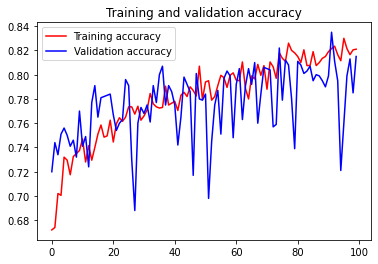

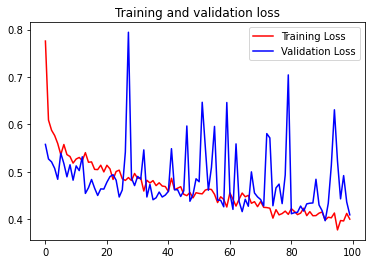

In [9]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()